# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Loading preprocessed data

In [2]:
X_train = pd.read_csv('../data/X_train.csv').values
X_test = pd.read_csv('../data/X_test.csv').values
y_train = pd.read_csv('../data/y_train.csv').values.ravel()  # ravel() converts it to a 1D array
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

In [3]:
print(X_train)

[[ 1.    0.    0.   ...  2.38  0.    0.41]
 [ 0.    0.    1.   ...  0.38 -0.01 -0.61]
 [ 0.    0.    1.   ...  0.38 -0.    0.01]
 ...
 [ 1.    0.    0.   ...  1.38  0.   -2.02]
 [ 1.    0.    0.   ...  1.38 -0.01  0.41]
 [ 0.    1.    0.   ...  3.38  0.    0.39]]


In [4]:
print(X_test)

[[ 1.    0.    0.   ... -0.62 -0.01  0.17]
 [ 0.    0.    1.   ...  1.38 -0.   -0.01]
 [ 1.    0.    0.   ...  0.38 -0.    0.39]
 ...
 [ 0.    0.    1.   ... -1.62 -0.01 -0.61]
 [ 1.    0.    0.   ... -0.62 -0.01  0.25]
 [ 0.    0.    1.   ...  0.38 -0.01  0.41]]


In [5]:
print(y_train)

[1118600.  620000. 2932800. ... 1350000.  664224. 1100000.]


In [6]:
print(y_test)

[ 410000. 1175000. 1021875. ...  368000.  640000.  639000.]


# Hyperparameter tuning for KNN


In [7]:
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Cross-validation for KNN


In [8]:
cv_scores_knn = -cross_val_score(best_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Corrected Cross-Validation Scores for KNN: {cv_scores_knn}')

Corrected Cross-Validation Scores for KNN: [1.40858378e+11 1.41268159e+11 1.49954023e+11 1.56586434e+11
 1.18355617e+11]


# Predictions on test set

In [11]:
y_pred_knn = best_knn.predict(X_test)

# Evaluate KNN

In [12]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'KNN Mean Squared Error on Test Set: {mse_knn}')
print(f'KNN R2 Score on Test Set: {r2_knn}')

KNN Mean Squared Error on Test Set: 135950912153.22543
KNN R2 Score on Test Set: 0.4750420041725615


# Plotting Loss Curve for KNN

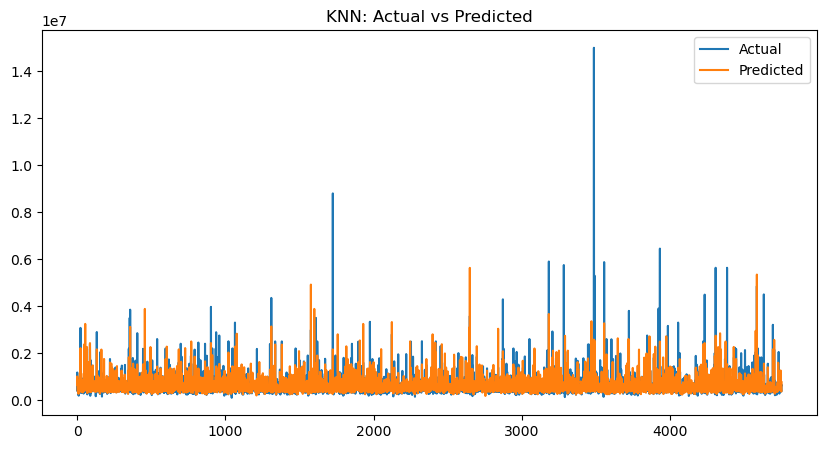

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_knn, label='Predicted')
plt.title('KNN: Actual vs Predicted')
plt.legend()
plt.show()

# Scatter Plot for KNN

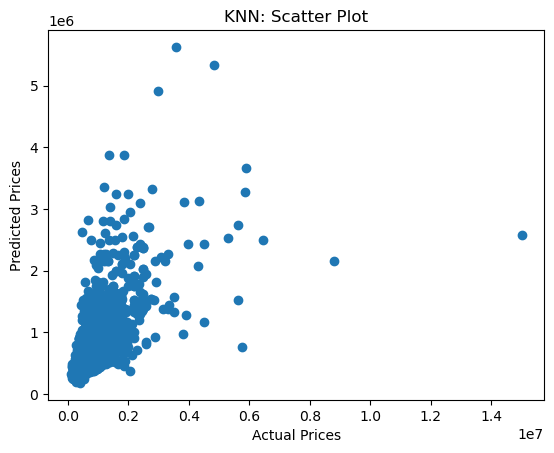

In [14]:
plt.scatter(y_test, y_pred_knn)
plt.title('KNN: Scatter Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()